In [11]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from math import sqrt

import matplotlib.pyplot as plt
import time

In [12]:
mat = loadmat('mnist_all.mat')

In [21]:
start_time = time.time()
merged_train_data = []
merged_train_label = []
merged_test_data = []
merged_test_label = []
for key in mat.keys():
    if("train" in key):
        merged_train_data.append(mat[key])
        merged_train_label.append(np.full((len(mat[key]), 1), key))
    if("test" in key):
        merged_test_data.append(mat[key])
        merged_test_label.append(np.full((len(mat[key]), 1), key))

#converting list of arrays to NDarray
merged_train_data = np.vstack(merged_train_data)
merged_train_label = np.vstack(merged_train_label)
test_data = np.vstack(merged_test_data)
test_label = np.vstack(merged_test_label)

column_indices = []
for i in range(784):
    if(i <= 84 or i>= 700):
        column_indices.append(i)
    if(i % 28 == 0):
        for j in range(i, i+4):
            column_indices.append(j)

arr = np.array(range(784)).reshape(28,28)
right_index=[]
for i in arr:
    for j in range(4):
        column_indices.append(i[-4]+j)

merged_train_data =  np.delete(merged_train_data, column_indices, axis = 1)

print(">> %.2f seconds" % (time.time() - start_time))

>> 0.06 seconds


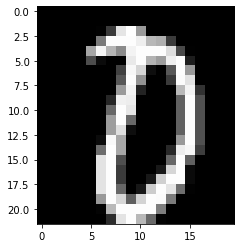

In [25]:
# image_cloumn.reshape((28,28))
# summed_data = cropped_merged_train_data.sum(axis=0)
summed_data = merged_train_data[150]
plt.gray()
plt.imshow(summed_data.reshape((22,20)))